In [1]:
import os, sys
cwd = os.getcwd()
project_path = cwd[:cwd.find('pygents')+7]
if project_path not in sys.path: sys.path.append(project_path)
os.chdir(project_path) 

#from importlib import reload  # Python 3.4+

import pickle
import pandas as pd

#force reimport
if 'pygents.util' in sys.modules:
    del sys.modules['pygents.util']
if 'pygents.text' in sys.modules:
    del sys.modules['pygents.text']
if 'pygents.plot' in sys.modules:
    del sys.modules['pygents.plot']
if 'pygents.token' in sys.modules:
    del sys.modules['pygents.token']
if 'pygents.token_plot' in sys.modules:
    del sys.modules['pygents.token_plot']


from pygents.token import *
from pygents.text import *
from pygents.util import *
from pygents.plot import plot_bars, plot_dict, matrix_plot
from pygents.token_plot import *


In [2]:
path = 'data/corpora/Russian/'
test_df = pd.read_csv(os.path.join(path,'magicdata/zh_en_ru_100/CORPUS_ZH_EN_RU.txt'),delimiter='\t')
test_texts = list(test_df['ru'])
print(len(test_texts))
test_df[['ru']]

100


,ru
0,Что насчет медицинской страховки? Что касается...
1,"Для тех, у кого есть страховка, по договору ст..."
2,Необходимо осознать важность наличия страховки.
3,"На самом деле, это явление действительно очень..."
4,Этому поколению родителей действительно необхо...
...,...
95,Ресо предлагает не только страхование автомоби...
96,"Однако при покупке дома, за исключением первон..."
97,Этот вид финансовых вложений имеет определенны...
98,"Если ваша инвестиционная ориентация верна, то ..."


In [3]:
for text in test_texts:
    print(text)

Что насчет медицинской страховки? Что касается моей семьи, то страховку купит либо взрослый, либо ребенок.
Для тех, у кого есть страховка, по договору страхования они получат компенсацию в размере 300 тысяч рублей.
Необходимо осознать важность наличия страховки.
На самом деле, это явление действительно очень распространено, например, для страхования от несчастных случаев, чем больше вы покупаете, тем больше страхуете.
Этому поколению родителей действительно необходимо покупать страховку.
Ну, прямо сейчас действительно желательно купить страховку.
Машину нужно покупать в полном объеме, а дом можно купить в кредит.
Вы можете купить страховку, страховка, конечно же, делится на множество категорий.
Медицинская страховка очень важна.
Эту часть денег платит страховая компания.
Послушайте, я не знаю, слышали ли вы когда-нибудь об этом, это страховка в Сбере.
Покупка дома на самом деле является инвестицией.
Вы когда-нибудь узнавали об обучении в Альфе?
Если он депонирован в банке, каков резуль

In [9]:
ref_tokenizer = DelimiterTokenizer()
thresholds = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
ngram_params = [[1],[2],[3],[4],[5],[6],[7],[1,2],[2,3],[1,2,3],[1,2,3,4],[4,5,6,7],[1,2,3,4,5],[1,2,3,4,5,6,7]]


75193666


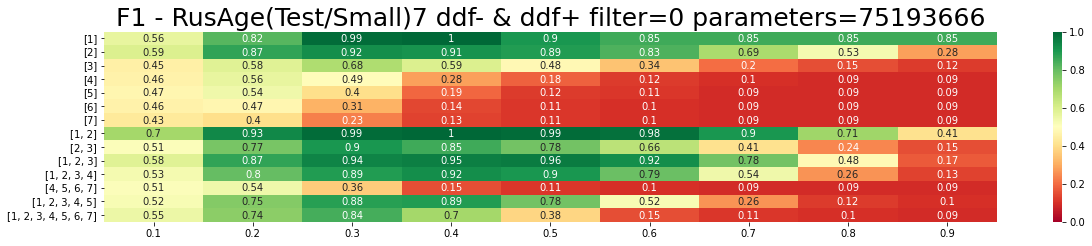

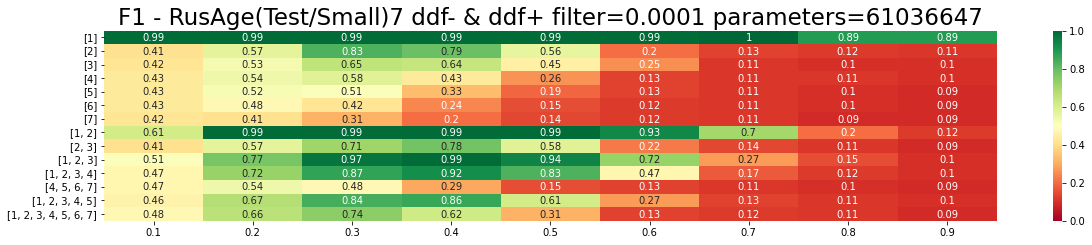

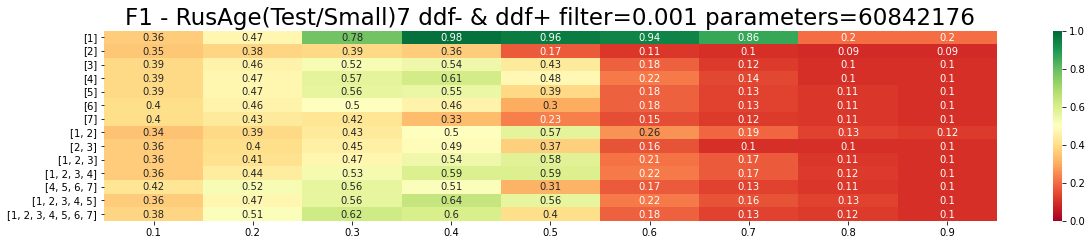

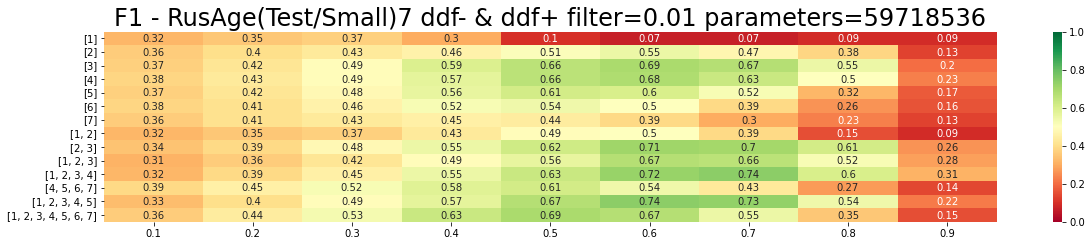

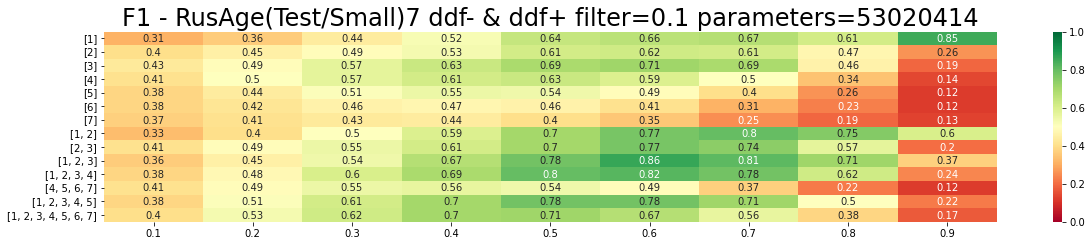

In [10]:
base = FreedomTokenizer(name='data/models/rusage_test_chars_7a',max_n=7,mode='chars',debug=False)
print(base.count_params())
title = 'F1 - RusAge(Test/Small)7 ddf- & ddf+'
for filter_threshold in [0,0.0001,0.001,0.01,0.1]:
    if filter_threshold > 0:
        model_compress_with_loss(base.model,filter_threshold)
    parameters = base.count_params()
    evaluate_freedom_tokenizer_options(test_texts,ref_tokenizer,FreedomBasedTokenizer(base,'ddf-','ddf+'),
        ngram_params,thresholds,title="{} filter={} parameters={}".format(title,filter_threshold,parameters))
del base


In [ ]:
base = FreedomTokenizer(name='data/models/rusage_chars_7a',max_n=7,mode='chars',debug=False)
print(base.count_params())
title = 'F1 - RusAge(Previews/Full)7 ddf- & ddf+'
for filter_threshold in [0,0.0001,0.001,0.01,0.1]:
    if filter_threshold > 0:
        model_compress_with_loss(base.model,filter_threshold)
    parameters = base.count_params()
    evaluate_freedom_tokenizer_options(test_texts,ref_tokenizer,FreedomBasedTokenizer(base,'ddf-','ddf+'),
        ngram_params,thresholds,title="{} filter={} parameters={}".format(title,filter_threshold,parameters))
del base


In [ ]:
#TODO trash the below when the above finishes

In [8]:
ngram_params = [[1],[2],[3],[4],[5],[1,2],[2,3],[1,2,3],[1,2,3,4],[1,2,3,4,5]]


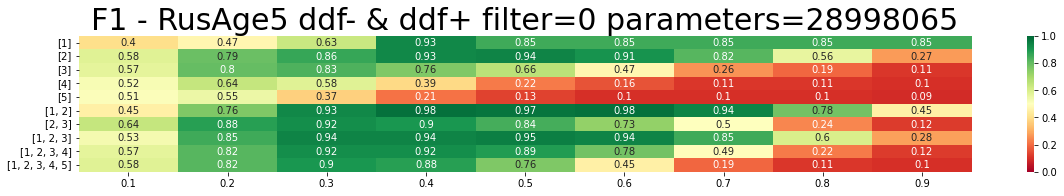

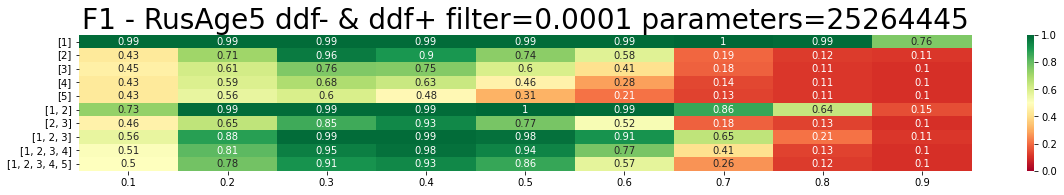

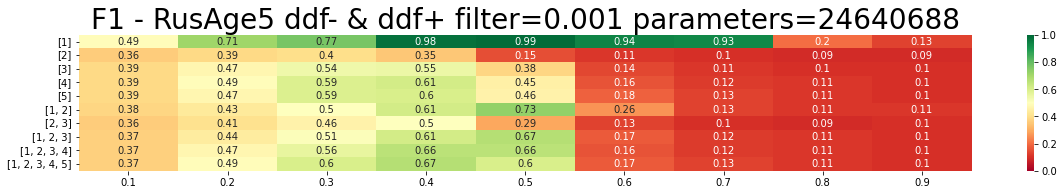

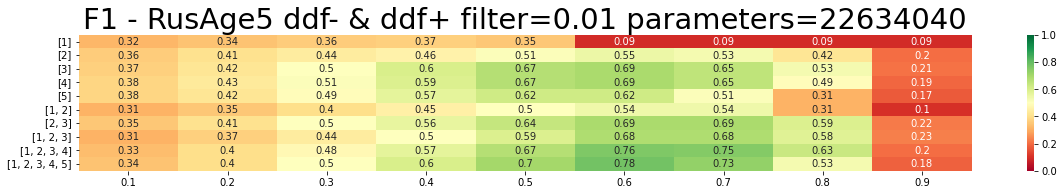

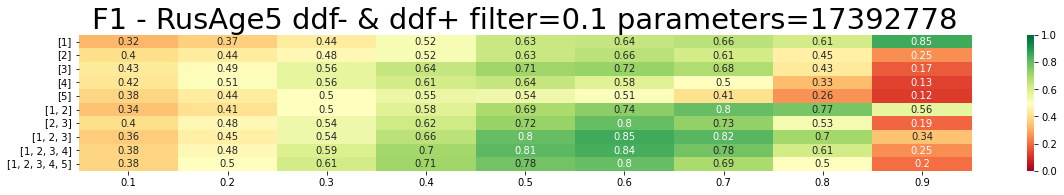

In [7]:
base = FreedomTokenizer(name='data/models/rusage_chars_5a',max_n=5,mode='chars',debug=False)
title = 'F1 - RusAge5 ddf- & ddf+'
for filter_threshold in [0,0.0001,0.001,0.01,0.1]:
    if filter_threshold > 0:
        model_compress_with_loss(base.model,filter_threshold)
    parameters = base.count_params()
    evaluate_freedom_tokenizer_options(test_texts,ref_tokenizer,FreedomBasedTokenizer(base,'ddf-','ddf+'),
        ngram_params,thresholds,title="{} filter={} parameters={}".format(title,filter_threshold,parameters))
del base


In [ ]:
del base